In [ ]:
#import data manipulation libraries
import numpy as np
import pandas as pd

#import data visualziation libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import logging
import logging
logging.basicConfig(filename='model.log',
                    level=logging.INFO,
                    filemode='w',
                      format='%(asctime)s:%(levelname)s:%(message)s',
                      force=True)

import warnings
warnings.filterwarnings('ignore')


In [ ]:
#data import using pandas function
url="https://raw.githubusercontent.com/Frisk516/Lung_cancer_MLModel/refs/heads/main/survey%20lung%20cancer.csv"
df=pd.read_csv(url,sep=',')
#shuffle the dataset
df.sample(frac=1)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
40,M,68,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
199,F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
165,M,63,1,2,2,1,2,1,2,2,2,2,1,2,1,YES
228,F,56,1,2,1,2,1,2,1,1,1,2,2,1,2,YES
233,F,49,1,2,2,1,1,1,1,1,1,2,1,1,1,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
217,F,56,2,2,2,2,2,1,2,2,2,1,1,2,2,YES
92,M,52,2,1,1,1,2,2,2,2,2,1,1,2,2,YES
27,M,69,1,1,1,2,1,2,1,2,1,2,2,1,2,NO


In [ ]:
logging.info("Data imported successfully")

In [ ]:
#separating numerical and categorical data
numerical_data=df.select_dtypes(exclude=object)
categorial_data=df.select_dtypes(include=object)

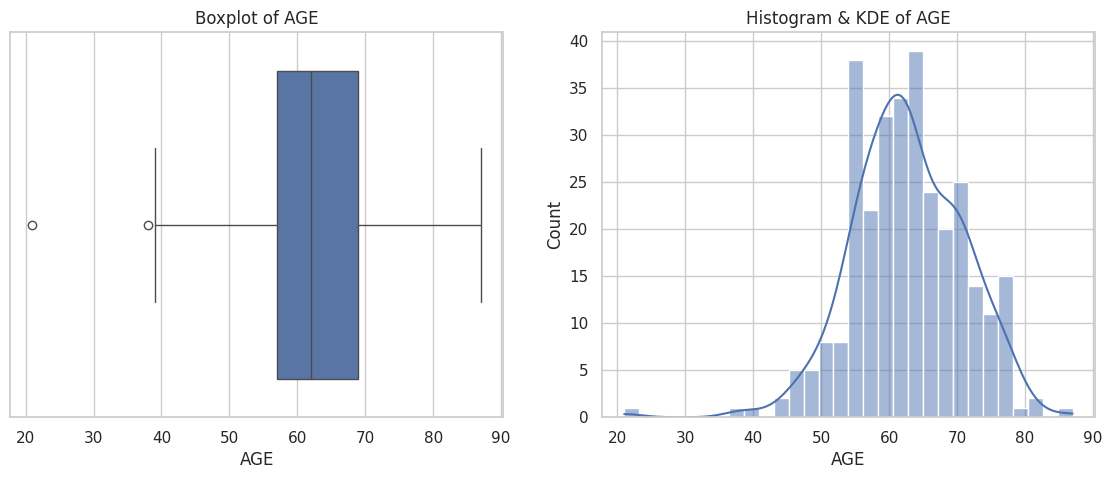

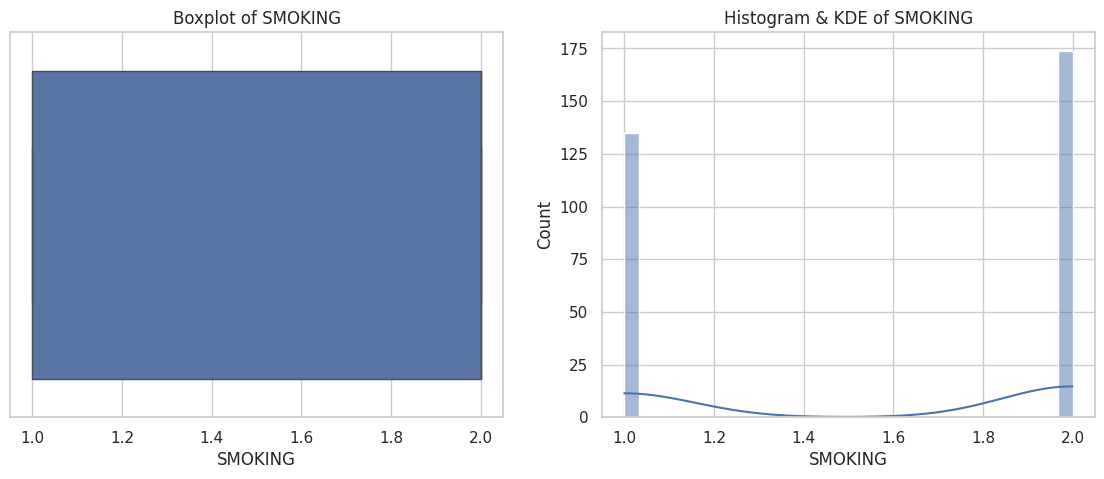

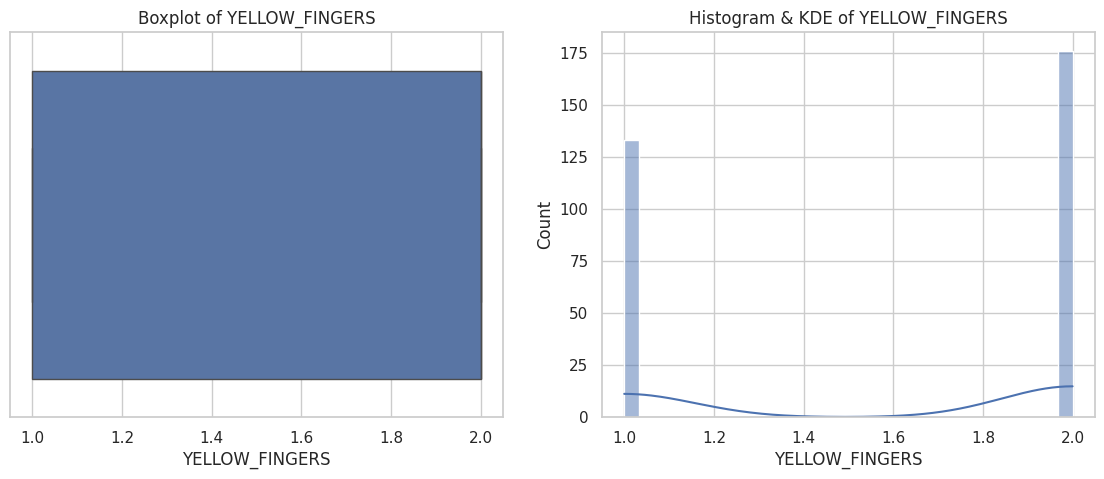

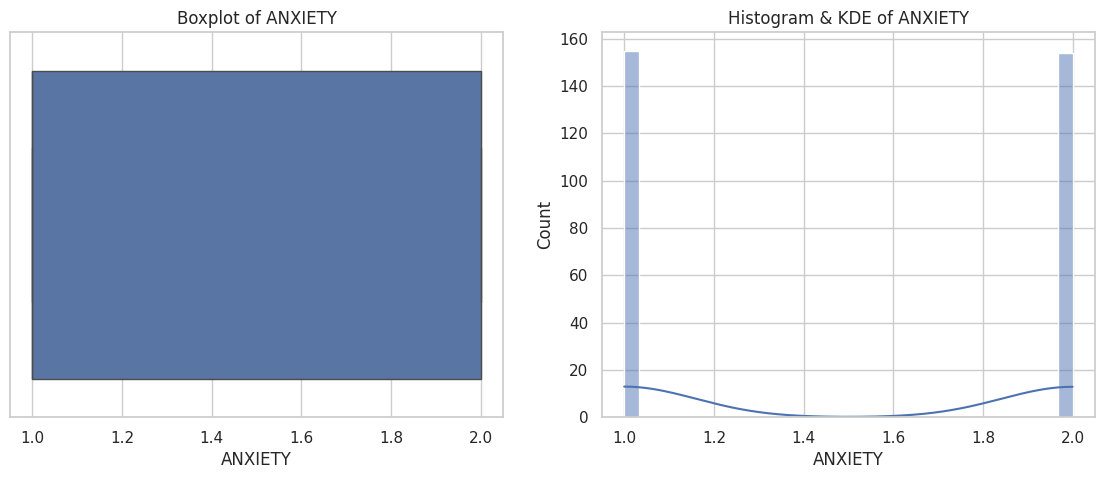

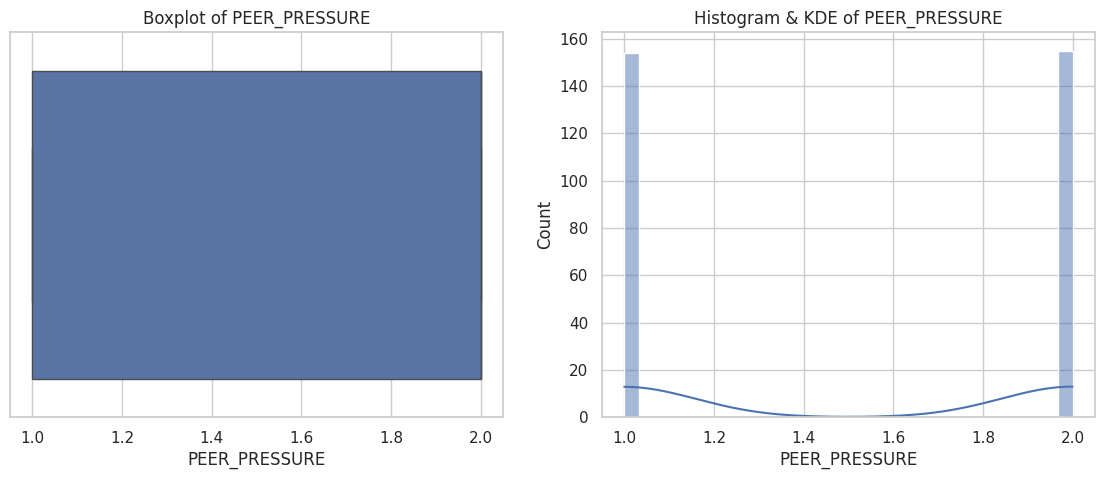

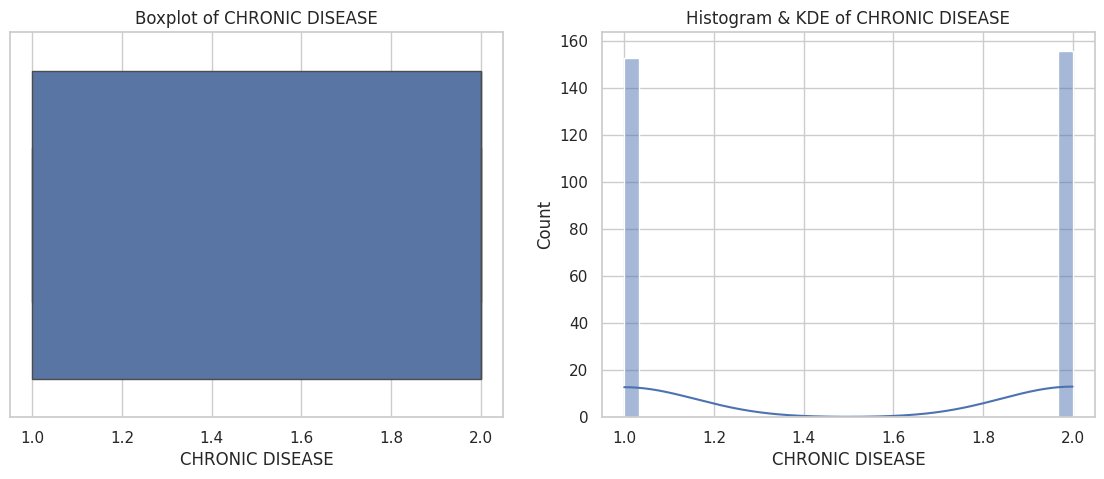

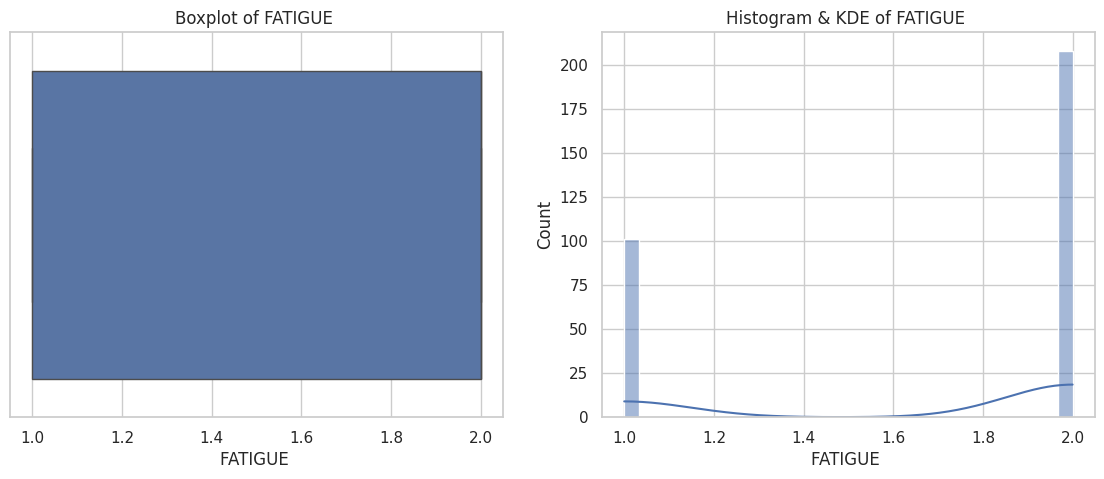

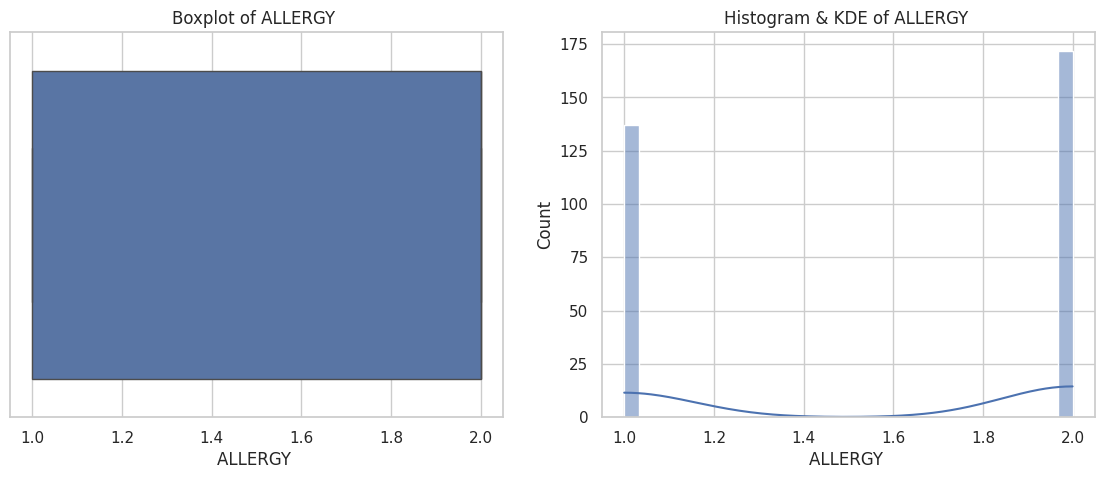

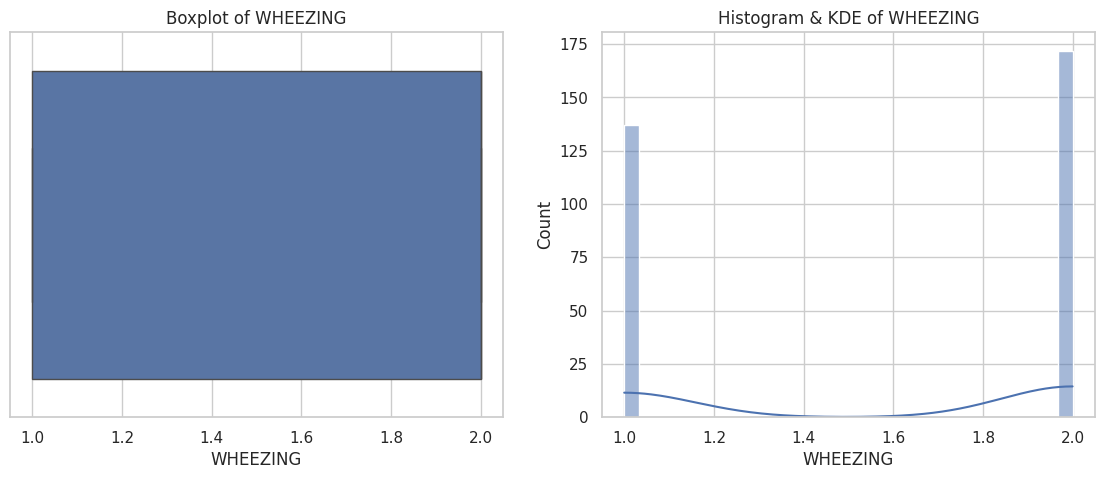

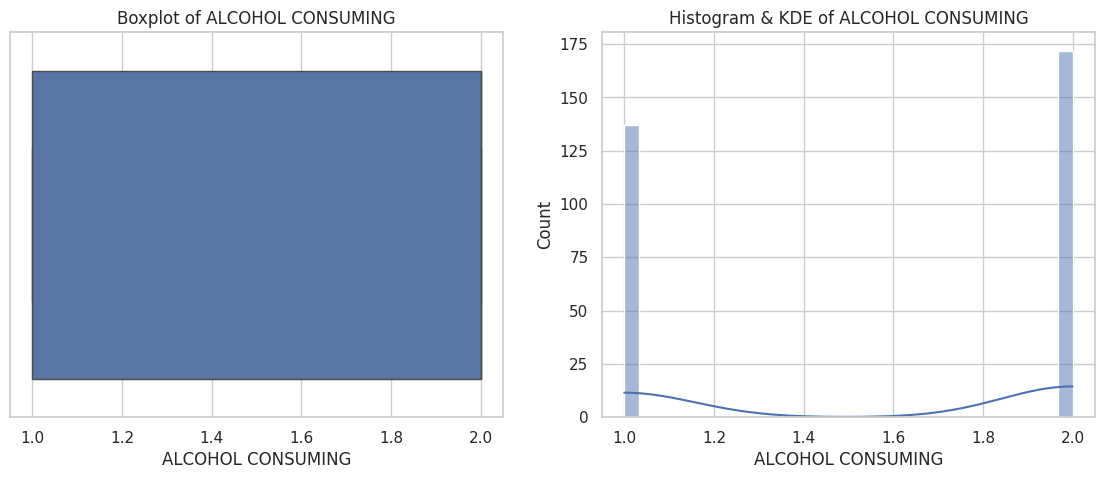

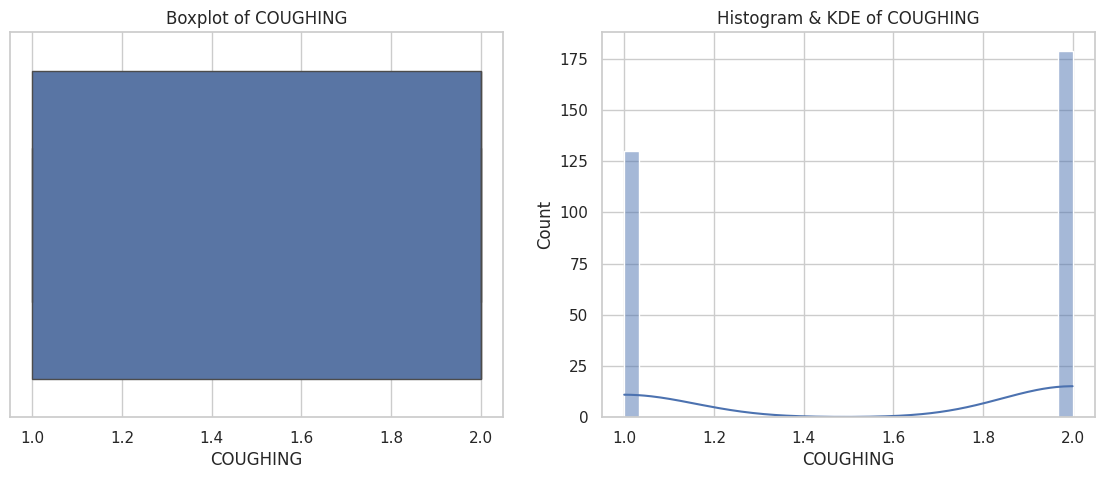

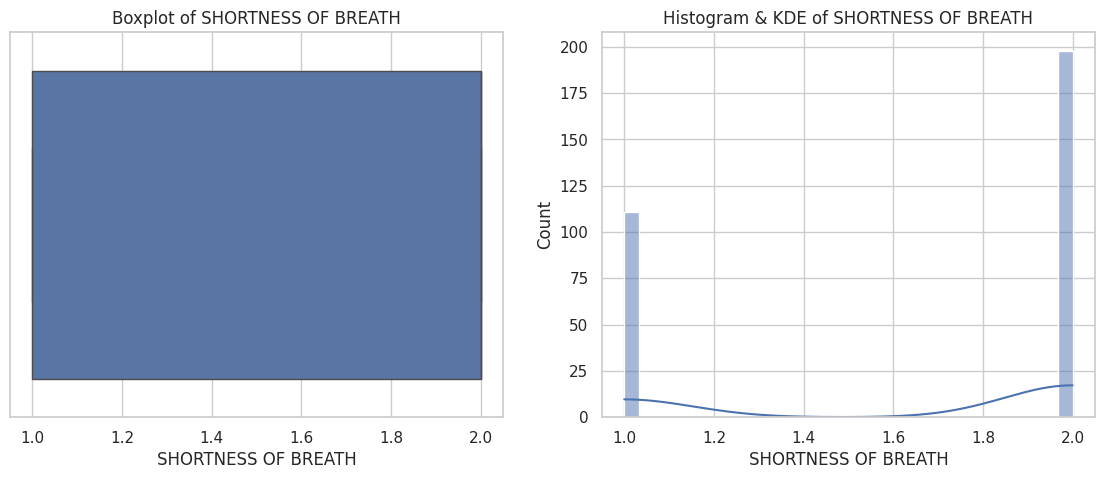

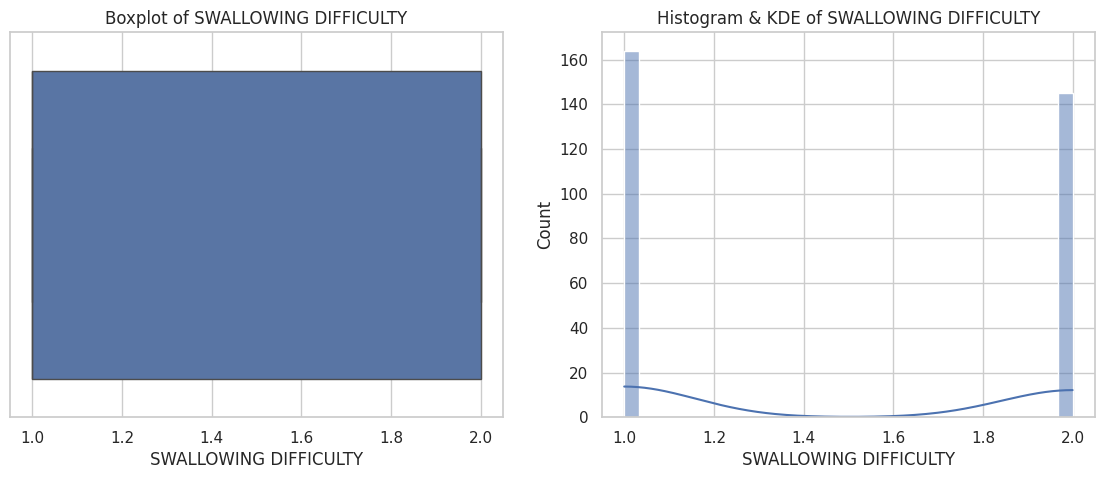

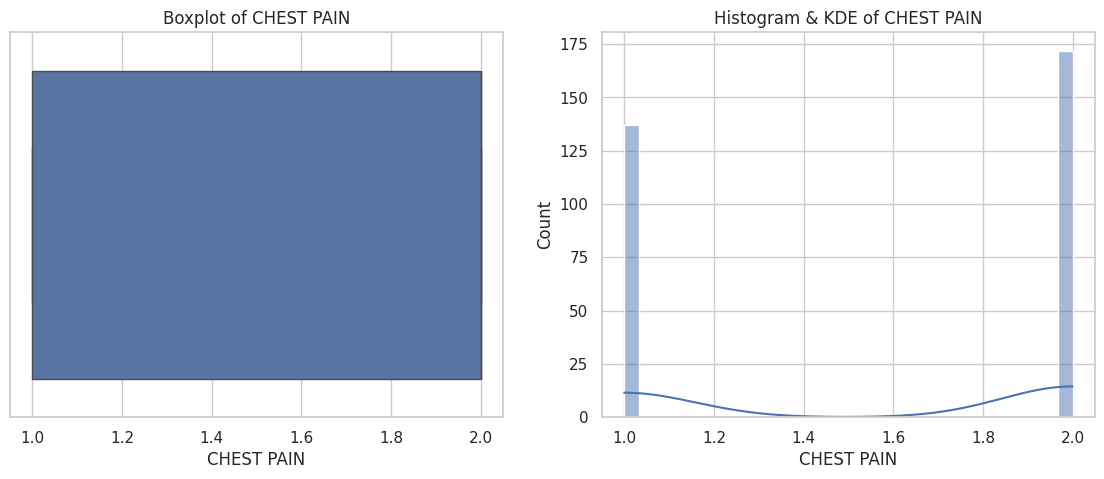

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Plot boxplots and bell curves for each numerical feature
for col in numerical_data.columns:
    plt.figure(figsize=(14, 5))

    # Boxplot (shows outliers as points beyond whiskers)
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    # Bell curve: histogram + KDE (to check distribution shape)
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram & KDE of {col}')

    plt.show()

In [ ]:
#performing EDA

from collections import OrderedDict
stats=[]
for i in numerical_data:
    numerical_stats=OrderedDict({
        'feature':i,
        'mean':df[i].mean(),
        'median':df[i].median(),
        'mode':df[i].mode()[0],
        'std':df[i].std(),
        'min':df[i].min(),
        'max':df[i].max(),
        'skewness':df[i].skew(),
        'kurtosis':df[i].kurt()
    })
    stats.append(numerical_stats)
    report=pd.DataFrame(stats)


# Outlier Identification :
outlier_label = []
for col in report['feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

# Checking Report
report

,feature,mean,median,mode,std,min,max,skewness,kurtosis,Outlier Comment
0,AGE,62.673139,62.0,64,8.210301,21,87,-0.395086,1.746558,Has Outliers
1,SMOKING,1.563107,2.0,2,0.496806,1,2,-0.255705,-1.947261,No Outliers
2,YELLOW_FINGERS,1.569579,2.0,2,0.495938,1,2,-0.282425,-1.932789,No Outliers
3,ANXIETY,1.498382,1.0,1,0.500808,1,2,0.006504,-2.013029,No Outliers
4,PEER_PRESSURE,1.501618,2.0,2,0.500808,1,2,-0.006504,-2.013029,No Outliers
5,CHRONIC DISEASE,1.504854,2.0,2,0.500787,1,2,-0.019513,-2.012689,No Outliers
6,FATIGUE,1.673139,2.0,2,0.469827,1,2,-0.741836,-1.459167,No Outliers
7,ALLERGY,1.556634,2.0,2,0.497588,1,2,-0.229118,-1.960235,No Outliers
8,WHEEZING,1.556634,2.0,2,0.497588,1,2,-0.229118,-1.960235,No Outliers
9,ALCOHOL CONSUMING,1.556634,2.0,2,0.497588,1,2,-0.229118,-1.960235,No Outliers


In [ ]:
#the data is non-normally distributed
logging.info("The data is non-normally distributed")


In [ ]:
#check for null values
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
#encoding gender and lung cancer columns

df['GENDER']=df['GENDER'].replace({'M':1,'F':2})
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES':2,'NO':1})


In [ ]:
#target column shows imbalanced data
df['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
2,270
1,39


In [ ]:
#dividing the dataset to prevent data leakage
X=df.drop('LUNG_CANCER',axis=1)
y=df['LUNG_CANCER']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

#the dataset has minor outliers
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
# Converting target labels 1 -> 0 and 2 -> 1 for binary classification
y_train = y_train.replace({1: 0, 2: 1})
y_test = y_test.replace({1: 0, 2: 1})

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#using FNN as the target column is binary
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(16, activation='relu'),                                   # Hidden layer
    Dense(1, activation='sigmoid')                                  # Output layer for binary classification
])

# Compile the model with optimizer, loss, and metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3998 - loss: 0.7457 - val_accuracy: 0.0897 - val_loss: 0.8811
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5740 - loss: 0.6731 - val_accuracy: 0.0000e+00 - val_loss: 0.9373
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6051 - loss: 0.6576 - val_accuracy: 0.0000e+00 - val_loss: 0.9483
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6229 - loss: 0.6416 - val_accuracy: 0.0000e+00 - val_loss: 0.9615
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6610 - loss: 0.5949 - val_accuracy: 0.0000e+00 - val_loss: 0.9823
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6134 - loss: 0.6007 - val_accuracy: 0.0000e+00 - val_loss: 0.9835
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6231 - loss: 0.5744 - val_accuracy: 0.0000e+00 - val_loss: 0.9791
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6301 - loss: 0.5542 - v

In [ ]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predict classes
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8442 - loss: 0.3138
Test Accuracy: 0.8602
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[ 8  8]
 [ 5 72]]
              precision    recall  f1-score   support

           0       0.62      0.50      0.55        16
           1       0.90      0.94      0.92        77

    accuracy                           0.86        93
   macro avg       0.76      0.72      0.73        93
weighted avg       0.85      0.86      0.85        93

